<h1> Hey &#128515; . Welcome to 'Hello world' of Machine Learning, the MNIST classification</h1>

<h1>A- Preparing data </h1>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


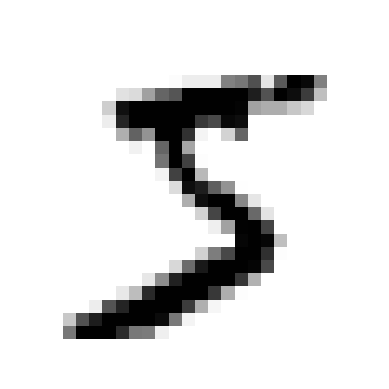

0    5
Name: class, dtype: uint8


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)
some_digit = np.array(X[:1])
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap= mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()
print(y[:1])

In [3]:
from sklearn.linear_model import SGDClassifier

X_train , X_test , y_train , y_test = X[:60000] , X[60000:] , y[:60000] , y[60000:]

y_train_5 = (y_train == 5)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict(some_digit)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [5]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix , precision_score, recall_score

#Confusion matrix
y_pred = cross_val_predict(sgd_clf, X_train, y_train_5 ,cv=3)

matrix = confusion_matrix(y_train_5, y_pred)
print(matrix)

#Precision / Recall

precision = precision_score(y_train_5, y_pred)
recall = recall_score(y_train_5, y_pred)
recall
precision

[[53892   687]
 [ 1891  3530]]


0.8370879772350012